In [2]:
!pip3 install -Uqq fastai

     |████████████████████████████████| 194kB 9.1MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 


In [1]:
import fastai
fastai.__version__

'2.4'

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
from fastai.text.all import *
import pandas as pd
import numpy as np

In [5]:
path = Path('/content/gdrive/MyDrive/subcellular-location/v2')

In [6]:
Path.BASE_PATH = path

In [7]:
path.ls()

(#5) [Path('LM_data_2021-03-11.csv'),Path('proteinClassifier.ipynb'),Path('data'),Path('models'),Path('AA_LM_model.pk')]

In [8]:
data = path / Path('data/processed/protein_data_2021-04-04.csv')

In [9]:
df = pd.read_csv(data, sep=';')
df.head()

,Sequence,Subcellular location [CC],Location
0,MTDTVFSNSSNRWMYPSDRPLQSNDKEQLQAGWSVHPGGQPDRQRKQEELTDEEKEIINRVIARAEKMEEMEQERIGRLVDRLENMRKNVAGDGVNRCILCGEQLGMLGSACVVCEDCKKNVCTKCGVETNNRLHSVWLCKICIEQREVWKRSGAWFFKGFPKQVLPQPMPIKKTKPQQPVSEPAAPEQPAPEPKHPARAPARGDSEDRRGPGQKTGPDPASAPGRGNYGPPVRRASEARMSSSSRDSESWDHSGGAGDSSRSPAGLRRANSVQASRPAPGSVQSPAPPQPGQPGTPGGSRPGPGPAGRFPDQKPEVAPSDPGTTAPPREERTGGVGGYPAVGAREDRMSHPSGPYSQASAAAPQPAAARQPPPPEEEEEEANSYDSDEATTLGALEFSLLYDQDNSSLQCTIIKAKGLKPMDSNGLADPYVKLHLLPGASKSNKLRTKTLRNTRNPIWNETLVYHGITDEDMQRKTLRISVCDEDKFGHNEFIGETRFSLKKLKPNQRKNFNICLERVIPMKRAGTTGSARGMALYEEEQVERVGDIEERGKILVSLMYSTQQGGLIVGIIRCVHLAAMDANGYSDPFVKLWLKP...,"SUBCELLULAR LOCATION: Cytoplasmic vesicle, secretory vesicle, synaptic vesicle membrane {ECO:0000250|UniProtKB:P47709}. Cell projection, dendritic spine {ECO:0000250|UniProtKB:P47709}. Cell junction, synapse, postsynaptic cell membrane {ECO:0000250|UniProtKB:P47709}. Membrane {ECO:0000250|UniProtKB:P47709}; Peripheral membrane protein {ECO:0000250|UniProtKB:P47709}.",Cytoplasm
1,MDTDSQRSHLSSFTMKLMDKFHSPKIKRTPSKKGKPAEVSVKIPEKPVNKEATDRFLPEGYPLPLDLEQQAVEFMSTSAVASRSQRQKNLSWLEEKEKEVVSALRYFKTIVDKMAIDKKVLEMLPGSASKVLEAILPLVQNDPRIQHSSALSSCYSRVYQSLANLIRWSDQVMLEGVNSEDKEMVTTVKGVIKAVLDGVKELVRLTIEKQGRPSPTSPVKPSSPASKPDGPAELPLTDREVEILNKTTGMSQSTELLPDATDEEVAPPKPPLPGIRVVDNSPPPALPPKKRQSAPSPTRVAVVAPMSRATSGSSLPVGINRQDFDVDCYAQRRLSGGSHSYGGESPRLSPCSSIGKLSKSDEQLSSLDRDSGQCSRNTSCETLDHYDPDYEFLQQDLSNADQIPQQTAWNLSPLPESLGESGSPFLGPPFQLPLGGHPQPDGPLAPGQQTDTPPALPEKKRRSAASQTADGSGCRVSYERHPSQYDNISGEDLQSTAPIPSVPYAPFAAILPFQHGGSSAPVEFVGDFTAPESTGDPEKPPPLPEKKNKHMLAYMQLLEDYSEPQPSMFYQTPQNEHIYQQKNKLLMEVYGFSDSF...,SUBCELLULAR LOCATION: Early endosome {ECO:0000269|PubMed:17724123}.,Endosome
2,MEDSTSPKQEKENQEELGETRRPWEGKTAASPQYSEPESSEPLEAKQGPETGRQSRSSRPWSPQSRAKTPLGGPAGPETSSPAPVSPREPSSSPSPLAPARQDLAAPPQSDRTTSVIPEAGTPYPDPLEQSSDKRESTPHHTSQSEGNTFQQSQQPKPHLCGRRDVSYNNAKQKELRFDVFQEEDSNSDYDLQQPAPGGSEVAPSMLEITIQNAKAYLLKTSSNSGFNLYDHLSNMLTKILNERPENAVDIFENISQDVKMAHFSKKFDALQNENELLPTYEIAEKQKALFLQGHLEGVDQELEDEIAENALPNVMESAFYFEQAGVGLGTDETYRIFLALKQLTDTHPIQRCRFWGKILGLEMNYIVAEVEFREGEDEEEVEEEDVAEERDNGESEAHEDEEDELPKSFYKAPQAIPKEESRTGANKYVYFVCNEPGRPWVKLPPVIPAQIVIARKIKKFFTGRLDAPIISYPPFPGNESNYLRAQIARISAGTHVSPLGFYQFGEEEGEEEEEAEGGRNSFEENPDFEGIQVIDLVESLSNWVHHVQHILSQGRCNWFNSIQKNEEEEEEEDEEKDDSDYIEQEVGLPLLTPIS...,"SUBCELLULAR LOCATION: Cytoplasm, cytoskeleton, cilium axoneme {ECO:0000305}. Cell projection, cilium {ECO:0000269|PubMed:19200523}. Note=Radial spoke. {ECO:0000305}.",Cytoplasm
3,MALPGARARGWAAAARAAQRRRRVENAGGSPSPEPAGRRAALYVHWPYCEKRCSYCNFNKYIPRRLEEAAMQKCLVTEAQTLLRLSGVQRVESVFFGGGTPSLASPHTVAAVLEAVAQAAHLPADLEVTLEANPTSAPGSRLAEFGAAGVNRLSIGLQSLDDTELRLLGRTHSACDALRTLAEARRLFPGRVSVDLMLGLPAQQVGPWLGQLQELLHHCDDHLSLYQLSLERGTALFAQVQRGALPAPDPELAAEMYQRGRAVLREAGFHQYEVSNFARNGALSTHNWTYWQCGQYLGVGPGAHGRFMPQGAGGHTREARIQTLEPDNWMKEVMLFGHGTRKRVPLGRLELLEEVLALGLRTDVGITHQHWQQFEPQLTLWDVFGANKEVQELLERGLLQLDHRGLRCSWEGLAVLDSLLLTLLPQLQEAWQQRTPSPVPGG,SUBCELLULAR LOCATION: Mitochondrion {ECO:0000305}.,Mitochondrion
4,MALLVDRVRGHWRIAAGLLFNLLVSICIVFLNKWIYVYHGFPNMSLTLVHFVVTWLGLYICQKLDIFAPKSLPPSRLLLLALSFCGFVVFTNLSLQNNTIGTYQLAKAMTTPVIIAIQTFCYQKTFSTRIQLTLIPITLGVILNSYYDVKFNFLGMVFAALGVLVTSLYQVWVGAKQHELQVNSMQLLYYQAPMSSAMLLVAVPFFEPVFGEGGIFGPWSVSALLMVLLSGVIAFMVNLSIYWIIGNTSPVTYNMFGHFKFCITLFGGYVLFKDPLSINQALGILCTLFGILAYTHFKLSEQEGSRSKLAQRP,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; Multi-pass membrane protein {ECO:0000305}.,Cell membrane


In [10]:
KMER_SIZE = 1 # One AA at the time

In [11]:
class AATokenizer():
  "Tokenizer for Amino Acids"

  def __init__(self, kmer_size=1, stride=1):
    self.kmer_size = kmer_size
    self.stride = stride
  
  def __call__(self, items):
    tokenized = []
    for item in items:
      tokenized_item = []
      for i in range (0, len(item) - self.kmer_size, self.stride):
        kmer = item[i: i + self.kmer_size]
        tokenized_item.append(kmer)

      tokenized.append(tokenized_item)

    return tuple(tokenized)

In [12]:
tok = AATokenizer(kmer_size=KMER_SIZE)

## Test of zonder rules of met rules beter werkt

In [ ]:
dblock = DataBlock(
    blocks=TextBlock.from_df('Sequence', is_lm=True, tok=tok, rules=[rm_useless_spaces]),
    get_x=ColReader('text'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [ ]:
dls = dblock.dataloaders(df, bs=16, shuffle=False)

KeyboardInterrupt: ignored

In [ ]:
dls.show_batch(max_n=2)

In [ ]:
learner = language_model_learner(dls, AWD_LSTM, pretrained=False)

In [ ]:
learner.fit(1)

epoch,train_loss,valid_loss,time
0,2.908503,2.890015,18:21


In [ ]:
dblock2 = DataBlock(
    blocks=TextBlock.from_df('Sequence', is_lm=True, tok=tok),
    get_x=ColReader('text'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [ ]:
dls2 = dblock2.dataloaders(df, bs=16, shuffle=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
dls2.show_batch(max_n=2)

,text,text_
0,x x b o s ▁ x x u p ▁ m r s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ a s l a w ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a q a k d d a k l e d n l l v l t v a t k,x b o s ▁ x x u p ▁ m r s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ a s l a w ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a q a k d d a k l e d n l l v l t v a t k e
1,l t a a v s t p a n s l a h s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ w g p e a q g d f t r w c q l g g l w t f v a l h g a f g l i g f m l r q f e l a,t a a v s t p a n s l a h s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ w g p e a q g d f t r w c q l g g l w t f v a l h g a f g l i g f m l r q f e l a r


In [ ]:
learner2 = language_model_learner(dls2, AWD_LSTM, pretrained=False)

In [ ]:
learner2.fit(1)

epoch,train_loss,valid_loss,time
0,2.786234,2.744235,18:23


## Conclusie, met rules werkt beter. Trainen met subset data.

Nu eerst even testen op een kleine subset data om te zien of het model beter word.

In [14]:
dblock = DataBlock(
    blocks=TextBlock.from_df('Sequence', is_lm=True, tok=tok),
    get_x=ColReader('text'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [15]:
dls = dblock.dataloaders(mini_data, bs=16, shuffle=False)

NameError: ignored

In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,x x b o s ▁ x x u p ▁ m r s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ a s l a w ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a q a k d d a k l e d n l l v l t v a t k,x b o s ▁ x x u p ▁ m r s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ a s l a w ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a q a k d d a k l e d n l l v l t v a t k e
1,l t a a v s t p a n s l a h s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ w g p e a q g d f t r w c q l g g l w t f v a l h g a f g l i g f m l r q f e l a,t a a v s t p a n s l a h s ▁ x x r e p ▁ 4 ▁ l ▁ x x u p ▁ w g p e a q g d f t r w c q l g g l w t f v a l h g a f g l i g f m l r q f e l a r


In [ ]:
learner = language_model_learner(dls, AWD_LSTM, pretrained=False, metrics=[accuracy])

SuggestedLRs(valley=tensor(0.0005))

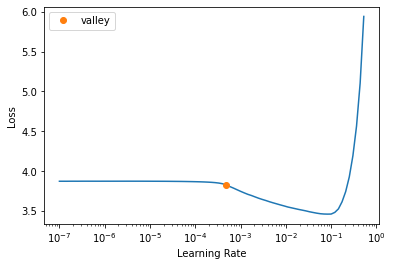

In [ ]:
learner.lr_find()

In [ ]:
learner.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.086429,3.070463,0.089846,00:27
1,3.074936,3.067664,0.089858,00:28
2,3.060845,3.055232,0.073864,00:28
3,3.051248,3.046469,0.089858,00:28
4,3.044646,3.040527,0.089858,00:28


## Conclusie, met trainen gaat de los vooruit. Nu dus trainen op complete dataset.

In [16]:
dblock = DataBlock(
    blocks=TextBlock.from_df('Sequence', is_lm=True, tok=tok),
    get_x=ColReader('text'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [17]:
dls = dblock.dataloaders(df, bs=16, shuffle=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [18]:
dls.show_batch(max_n=2)

,text,text_
0,x x b o s ▁ x x u p ▁ m q s l m q a p l l i a l g ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a a p a q a h l k k p s q l s s f s w d n c d e g k d p a v i,x b o s ▁ x x u p ▁ m q s l m q a p l l i a l g ▁ x x r e p ▁ 3 ▁ l ▁ x x u p ▁ a a p a q a h l k k p s q l s s f s w d n c d e g k d p a v i r
1,l a a g h s e p g v s q t p r h k v t n m g q e v i l r c d p s s g h m f v h w y r q n l r q e m k l l i s f q y q n i a v d s g m p k e r f t,a a g h s e p g v s q t p r h k v t n m g q e v i l r c d p s s g h m f v h w y r q n l r q e m k l l i s f q y q n i a v d s g m p k e r f t a


In [19]:
# To fp16 makes the model train faster, since there are less decimals
learner = language_model_learner(dls, AWD_LSTM, pretrained=False, metrics=[accuracy]).to_fp16()

In [26]:
# Load the pretrained amin-acid model
model = path / Path('models/LM_KMER_1_epoch_2')
learner = learner.load(model)

RuntimeError: ignored

Even uitzoeken of er layers gefreezed zijn

In [27]:
for _, layer in enumerate(learner.model.parameters()):
  print(layer.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True


Alles staat op requires_grad true omdat het geen pretrained model is :)

SuggestedLRs(valley=tensor(0.0012))

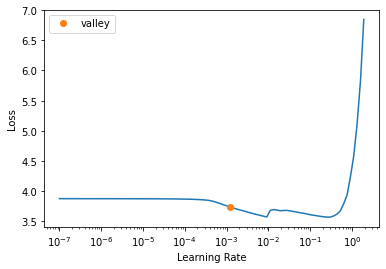

In [28]:
learner.lr_find()

In [29]:
filename = 'LM_KMER_1_FINE_TUNE_'

In [30]:
for i in range(1, 11):
  learner.fit_one_cycle(1, lr_max=1e-3)
  out_filename = filename + 'epoch_' + str(i)
  learner.save_encoder(out_filename)

epoch,train_loss,valid_loss,accuracy,time
0,2.515025,2.529716,0.224241,08:58


epoch,train_loss,valid_loss,accuracy,time
0,2.499572,2.504756,0.233314,08:53


epoch,train_loss,valid_loss,accuracy,time
0,2.483988,2.481313,0.240792,08:52


epoch,train_loss,valid_loss,accuracy,time
0,2.472246,2.465991,0.245318,08:51


epoch,train_loss,valid_loss,accuracy,time
0,2.463144,2.454431,0.248818,08:51


epoch,train_loss,valid_loss,accuracy,time
0,2.458020,2.445609,0.251849,08:51


epoch,train_loss,valid_loss,accuracy,time
0,2.453618,2.438190,0.254560,08:51


epoch,train_loss,valid_loss,accuracy,time
0,2.450292,2.431220,0.256723,08:53


epoch,train_loss,valid_loss,accuracy,time
0,2.446877,2.426435,0.258711,08:55


epoch,train_loss,valid_loss,accuracy,time
0,2.445040,2.421447,0.260208,09:01


SuggestedLRs(valley=tensor(0.0001))

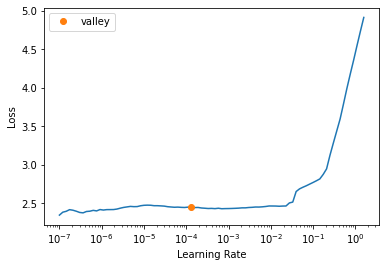

In [31]:
learner.lr_find()

In [32]:
for i in range(11, 21):
  learner.fit_one_cycle(1, lr_max=1e-4)
  out_filename = filename + 'epoch_' + str(i)
  learner.save_encoder(out_filename)

epoch,train_loss,valid_loss,accuracy,time
0,2.444816,2.418763,0.261419,08:53


epoch,train_loss,valid_loss,accuracy,time
0,2.446126,2.416929,0.261910,08:52


epoch,train_loss,valid_loss,accuracy,time
0,2.444172,2.415578,0.262452,09:06


epoch,train_loss,valid_loss,accuracy,time
0,2.443965,2.414339,0.262872,09:19


epoch,train_loss,valid_loss,accuracy,time
0,2.444604,2.413300,0.263315,08:52


epoch,train_loss,valid_loss,accuracy,time
0,2.445267,2.412358,0.263847,08:51


epoch,train_loss,valid_loss,accuracy,time
0,2.441433,2.411359,0.264216,08:50


epoch,train_loss,valid_loss,accuracy,time
0,2.445273,2.410414,0.264510,08:52


epoch,train_loss,valid_loss,accuracy,time
0,2.442094,2.409754,0.264919,08:53


epoch,train_loss,valid_loss,accuracy,time
0,2.441750,2.408892,0.265205,08:55
